DB Index: 0.932037310279212


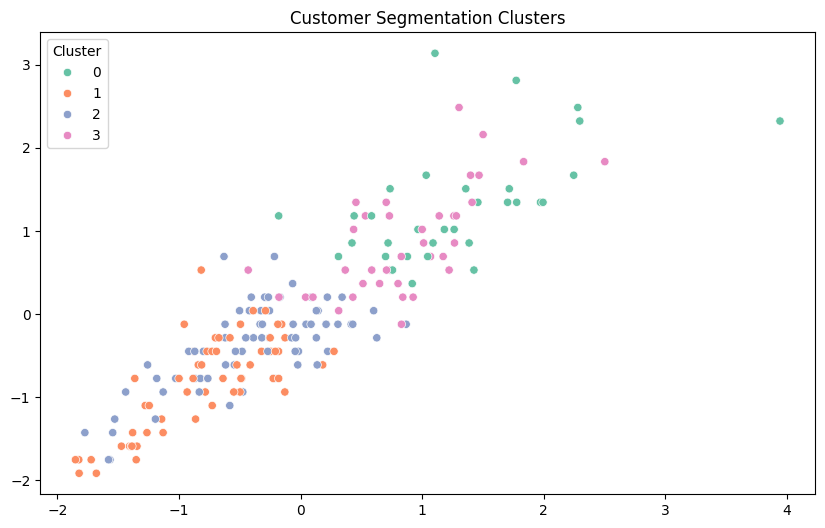

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customer_data = pd.read_csv('Customers.csv')
product_data = pd.read_csv('Products.csv')
transaction_data = pd.read_csv('Transactions.csv')
# Task 1: Exploratory Data Analysis (EDA)
# Merge datasets for comprehensive analysis
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


# Task 3: Customer Segmentation / Clustering
# Clustering based on transaction and profile features
clustering_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: le.transform([x.iloc[0]])[0]
}).reset_index()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features.iloc[:, 1:])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate using DB Index
def db_index(X, labels):
    from sklearn.metrics import pairwise_distances
    n_clusters = len(set(labels))
    cluster_k = [X[labels == k] for k in range(n_clusters)]
    centroids = [np.mean(k, axis=0) for k in cluster_k]
    s = [np.mean(pairwise_distances(k, [centroids[i]])) for i, k in enumerate(cluster_k)]
    dbi = sum(
        [
            max(
                [
                    (s[i] + s[j]) / np.linalg.norm(centroids[i] - centroids[j])
                    for j in range(n_clusters) if i != j
                ]
            )
            for i in range(n_clusters)
        ]
    ) / n_clusters
    return dbi

db_index_value = db_index(scaled_features, kmeans.labels_)
print("DB Index:", db_index_value)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], hue=clustering_features['Cluster'], palette='Set2'
)
plt.title('Customer Segmentation Clusters')
plt.show()

# Save Clustering Report
clustering_features.to_csv('Durga_Sai_Deepak_Yelleti_Clustering.csv', index=False)

